EMBOT

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
DATA_PATH = "data/raw/text.csv"

df = pd.read_csv(DATA_PATH)
print("Jumlah baris:", len(df))
df.head()


Jumlah baris: 416809


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [5]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


,Unnamed: 0,text,label
count,416809.000000,416809,416809.000000
unique,NaN,393822,NaN
top,NaN,i feel more adventurous willing to take risks,NaN
freq,NaN,16,NaN
mean,208404.000000,NaN,1.554271
std,120322.538513,NaN,1.490453
min,0.000000,NaN,0.000000
25%,104202.000000,NaN,0.000000
50%,208404.000000,NaN,1.000000
75%,312606.000000,NaN,3.000000


In [6]:
print(df.isnull().sum())


Unnamed: 0    0
text          0
label         0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_28176\3028549614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette='cool')


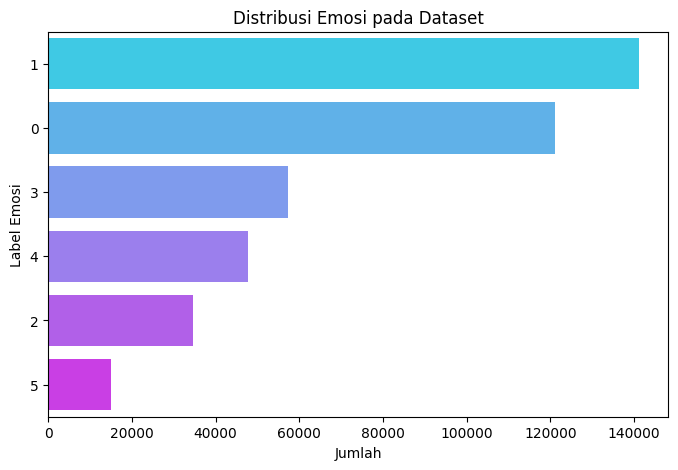

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(y=df['label'], order=df['label'].value_counts().index, palette='cool')
plt.title("Distribusi Emosi pada Dataset")
plt.xlabel("Jumlah")
plt.ylabel("Label Emosi")
plt.show()


In [8]:
print("Jumlah kategori unik:", df['label'].nunique())
print(df['label'].value_counts())


Jumlah kategori unik: 6
label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64


In [10]:
df['label'].head(), df['label'].dtype


(0    4
 1    0
 2    4
 3    0
 4    4
 Name: label, dtype: int64,
 dtype('int64'))

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])


In [12]:
# Lihat mapping label ke angka
print(dict(zip(le.classes_, le.transform(le.classes_))))


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


In [13]:
# Contoh
label = le.inverse_transform([0])
print(label)


[0]


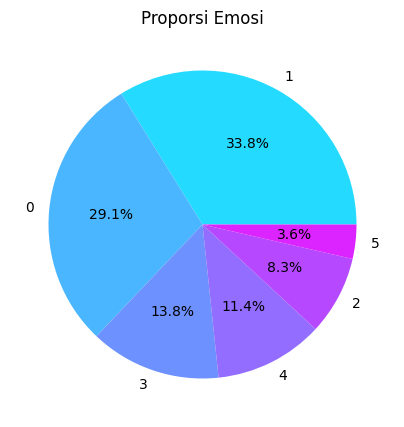

In [16]:
plt.figure(figsize=(5,5))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('cool'))
plt.title("Proporsi Emosi")
plt.ylabel("")
plt.show()


In [17]:
df["label"].unique()


array([4, 0, 2, 1, 5, 3], dtype=int64)

In [18]:
emotion_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

# Jika kamu ingin lihat versi teksnya:
df['emotion_label'] = df['label'].map(emotion_map)
df.head()


,Unnamed: 0,text,label,label_encoded,emotion_label
0,0,i just feel really helpless and heavy hearted,4,4,fear
1,1,ive enjoyed being able to slouch about relax a...,0,0,sadness
2,2,i gave up my internship with the dmrg and am f...,4,4,fear
3,3,i dont know i feel so lost,0,0,sadness
4,4,i am a kindergarten teacher and i am thoroughl...,4,4,fear


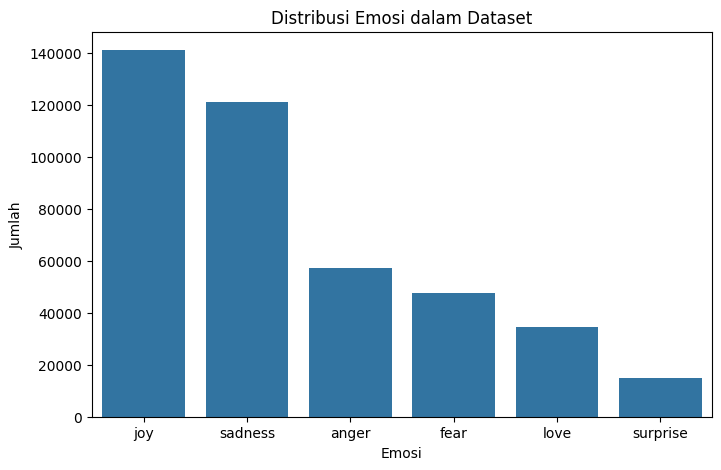

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='emotion_label', order=df['emotion_label'].value_counts().index)
plt.title("Distribusi Emosi dalam Dataset")
plt.xlabel("Emosi")
plt.ylabel("Jumlah")
plt.show()


In [20]:
for emotion in df['emotion_label'].unique():
    print(f"🔹 {emotion.upper()}")
    print(df[df['emotion_label'] == emotion]['text'].sample(3, random_state=42).to_list())
    print("-"*60)


🔹 FEAR
['i feel that it creates a suspicious environment where every american is suspect who doesnt goose step to the majority party in power', 'i feel reluctant asking for anything', 'i am afraid to really show what i feel because im terrified of having it thrown back in my face']
------------------------------------------------------------
🔹 SADNESS
['ive learned to surround myself with women who lift me up and leave me feeling nurtured rather than drained', 'i already feel crappy because of this and you being upset at me or the situation doesnt help', 'i feel like i have lost mourned and moved past the tears in this relationship']
------------------------------------------------------------
🔹 LOVE
['i know how that feels hermione said in a surprisingly sympathetic voice', 'i feel lovely encoding utf locale en isprivate false ismobile false mobileclass languagedirection ltr feedlinks link rel alternate type application atom xml title ri t ch styles', 'i was actually just feeling a li

In [21]:
import os
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/emotion_dataset_clean.csv", index=False)
